###Import the necessary libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###Load and explore the dataset

In [3]:
iris = load_iris()

In [4]:
x=iris.data
y=iris.target

In [5]:
print("feature names:", iris.feature_names)
print("target names:", iris.target_names)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


In [7]:
print("Shape of data:", x.shape) #rows and columns

Shape of data: (150, 4)


In [9]:
print("\nFirst 5 samples:\n", x[:5])
print("\nLabels for first 5 samples:", y[:5])


First 5 samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Labels for first 5 samples: [0 0 0 0 0]


###Step 3: Split into training and testing data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print("Training samples:", len(x_train))
print("Testing samples:", len(x_test))

Training samples: 120
Testing samples: 30


###Step 4: Create and train the KNN classifier

In [11]:
knn=KNeighborsClassifier(n_neighbors=3) #using 3 nearest neighbors
knn.fit(x_train, y_train) #train the model

KNeighborsClassifier(n_neighbors=3)

###Step 5: Make predictions

In [16]:
#Use the model to predict on test data
y_pred = knn.predict(x_test)

# Show predictions vs actual results
print("Predictions  :", y_pred)
print("Actual labels:", y_test)

Predictions  : [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


###Step 6: Evaluate the model

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

print("\nDetailed Classification report:\n")
print (classification_report(y_test, y_pred, target_names=iris.target_names))

Model Accuracy: 1.0

Detailed Classification report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



###Step 7: Visualize the model

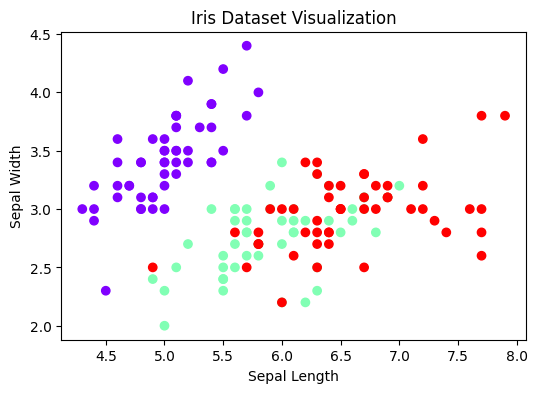

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset Visualization')
plt.show()


###Step 8: Predict a new flower

In [20]:
# Example: a flower with Sepal Length=5.5, Sepal Width=2.8, Petal Length=4.0, Petal Width=1.2

new_flower = [[5.5, 2.8, 4.0, 1.2]]  # features must be in the same order as the dataset

# Predict the species using the trained KNN model
prediction = knn.predict(new_flower)

# Convert prediction number to species name
species_name = iris.target_names[prediction[0]]

print("Predicted species for the new flower:", species_name)

Predicted species for the new flower: versicolor


###Step 9: Visualization with the new flower

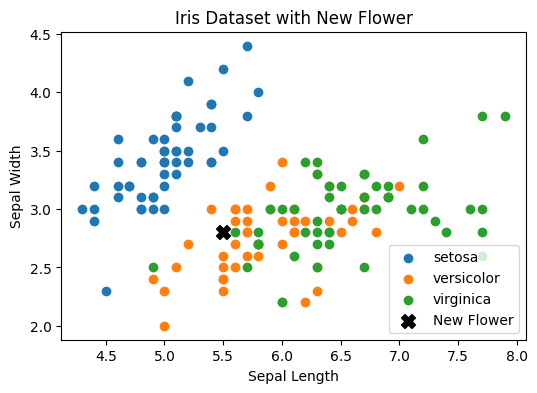

In [24]:

plt.figure(figsize=(6,4))

# Plot each species separately
for species_id, species_name in enumerate(iris.target_names):
    plt.scatter(
        x[y == species_id, 0],  # Sepal Length for this species
        x[y == species_id, 1],  # Sepal Width for this species
        label=species_name
    )

# Plot the new flower
plt.scatter(new_flower[0][0], new_flower[0][1], c='black', marker='X', s=100, label='New Flower')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset with New Flower')
plt.legend()
plt.show()
